# Results

We will present the results of the metrics in this notebook.

In [1]:
from results_preparation import *

In [2]:
folder = "../../XAI_metrics/metrics/"

## Sum of the ROI divided by the Total sum

### Saliency Maps

#### All Values

Mean value of initial beat: 8.72 +- 5.16%
Mean value of final beat: 22.74 +- 11.46%


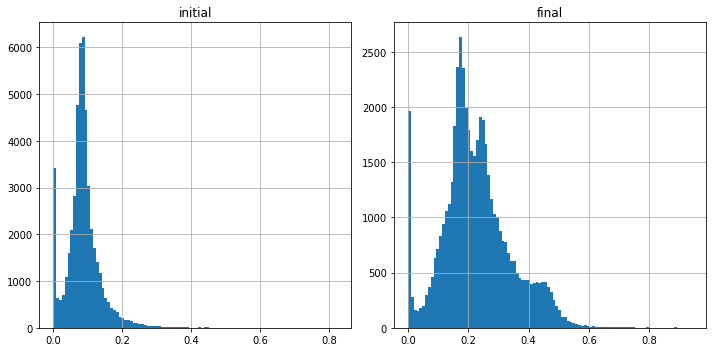

In [4]:
values = present_values(folder, "grad_cam")

#### All But 0's

In [8]:
present_values(folder, "grad_cam", 0)

#### Correct Classification

In [9]:
present(folder, "grad_cam", ['pred_results', 'ok'], but_zeros=False)

#### Incorrect Classification

In [10]:
present(folder,"grad_cam", ['pred_results', 'wrong'], but_zeros=False)

#### Normal Label

In [11]:
present(folder, "grad_cam", ['true_labels', 'normal'], but_zeros=False)

#### Abnormal Label

In [12]:
present(folder, "grad_cam", ['true_labels', 'abnormal'], but_zeros=False)

# Attention Maps Comparison

In [13]:
# folder = '../../data/attribution_maps/'
folder_maps = "/mnt/Media/bernardo/attribution_maps_revisited/"

In [14]:
maps_comparison("initial", "grad_cam_map", "normal", folder_maps)